In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os

In [3]:
pp = "/net/projects/scratch/winter/valid_until_31_July_2022/krumnack/animal-communication-data/Chimp_IvoryCoast/manually_verified_2s/chimp_only_23112020_with_ids"
files = [os.path.join(pp,f) for f in os.listdir(pp) if os.path.isfile(os.path.join(pp,f)) and f.endswith('.wav')]
files[0]

'/net/projects/scratch/winter/valid_until_31_July_2022/krumnack/animal-communication-data/Chimp_IvoryCoast/manually_verified_2s/chimp_only_23112020_with_ids/call-chimp-kub-phsm_33152_2012_1164_2000_4000.wav'

In [42]:
files[-1].endswith('/')

False

In [4]:
filename = files[0]
y,sr  =  librosa.load(filename)

In [5]:
ipd.Audio(filename)

In [6]:
figpath =  os.path.join(os.getcwd(),"figures")

In [7]:
# Extract RMSE with librosa


FRAME_LENGHT =  1024
HOP_LENGTH =  512

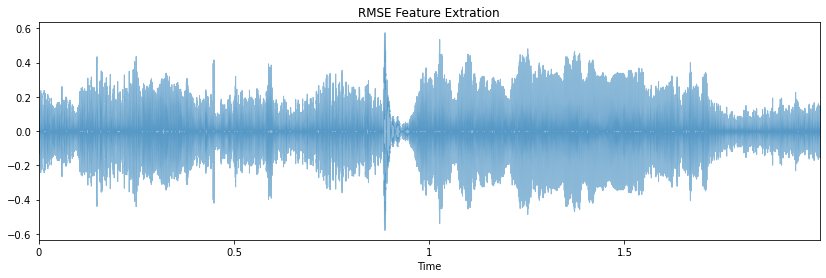

In [8]:
# Next we want to visualize the rmse for the  audio wave 

plt.figure(1,figsize=(14,4))
librosa.display.waveplot(y,alpha=0.5)
plt.title("RMSE Feature Extration")
plt.savefig(f'{figpath}/Waveform.pdf', dpi=300)
plt.show()

In [9]:
# We are deriving spectrum using FT

ft =  sp.fft.fft(y)
magnitude =  abs(ft)
freq =  np.linspace(0,sr,len(magnitude))




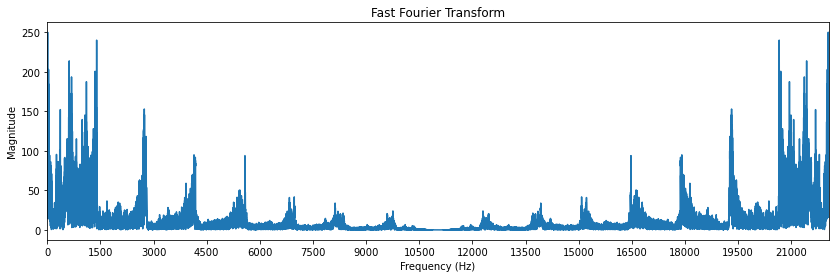

In [10]:
# plot spectrum

# Next we want to visualize the rmse for the  audio wave 

plt.figure(1,figsize=(14,4))
plt.plot(freq,magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xticks(np.arange(min(freq), max(freq)+1, 1500.0))
plt.xlim([0,max(freq)])
plt.title("Fast Fourier Transform")
plt.savefig(f'{figpath}/FFT.pdf', dpi=300)
plt.show()


$$
 c =  |c| \cdot e^{i\gamma}
$$

In [11]:
a =  2 + 1j

In [12]:
abs(a)

2.23606797749979

In [13]:
FRAME_SIZE =  1024
HOP_SIZE = 512

In [14]:
sig_stft = librosa.stft(y,n_fft=FRAME_SIZE,hop_length=HOP_SIZE)
y,sr  =  librosa.load(filename)

In [15]:
sig_stft.shape

(513, 87)

In [16]:
type(sig_stft[0,0])

numpy.complex64

In [17]:
# Calculating the spectrogram

Y_scale =  np.abs(sig_stft)


In [18]:
Y_scale.shape

(513, 87)

In [19]:
def plot_spectrogram(Y,sr,hop_length,y_axis="linear"):
    plt.figure(figsize=(8,6))
    librosa.display.specshow(Y,sr=sr,hop_length=hop_length, x_axis="time", y_axis=y_axis)
    plt.colorbar(format="%+2.f")

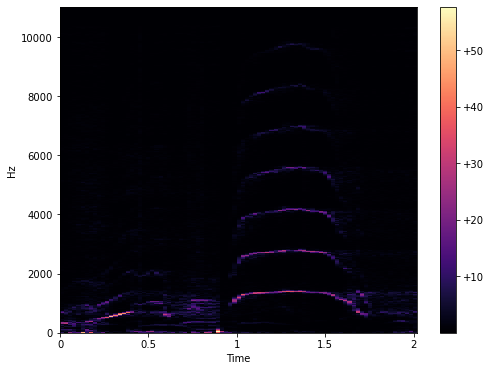

In [20]:
plot_spectrogram(Y_scale,sr,HOP_SIZE)

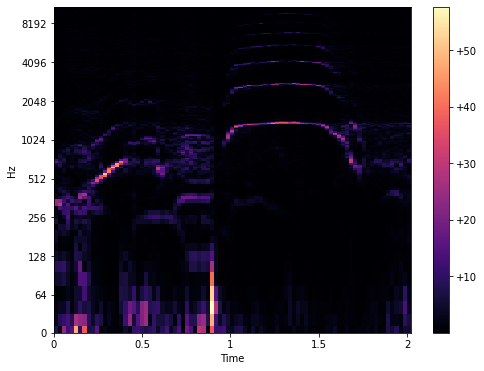

In [21]:
plot_spectrogram(Y_scale,sr,HOP_SIZE,y_axis='log')

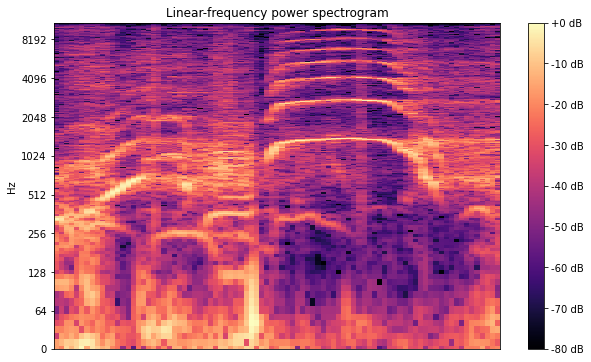

In [22]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10,6))
# plt.subplot(4, 2, 1)
img = librosa.display.specshow(D, y_axis='log',sr=sr,hop_length=HOP_SIZE)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
# plt.axis('off') # no axis
# plt.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
plt.savefig(f'{figpath}/spectrogram.pdf', dpi=300,bbox_inches=None, pad_inches=0)
plt.show()

Text(0.5, 1.0, 'Constant-Q power spectrogram (note)')

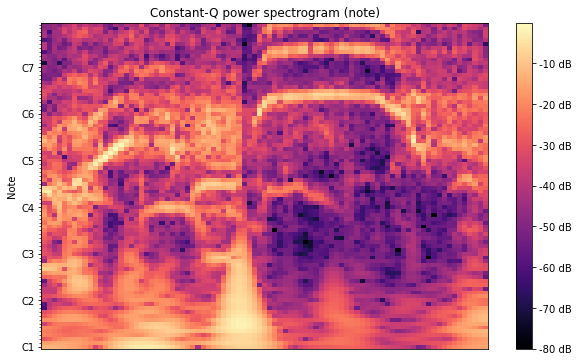

In [23]:
CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr)), ref=np.max)
# plt.subplot(4, 2, 3)
plt.figure(figsize=(10,6))
librosa.display.specshow(CQT, y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (note)')

Text(0.5, 1.0, 'Constant-Q power spectrogram (Hz)')

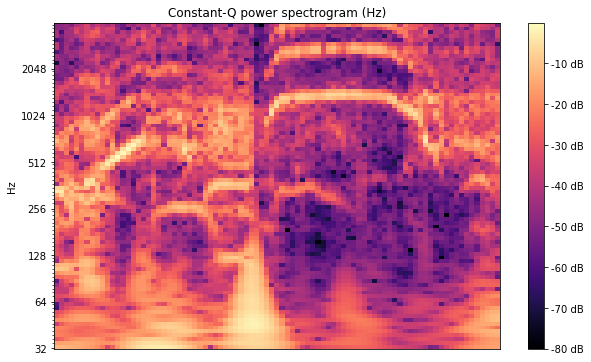

In [24]:
CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr)), ref=np.max)
# plt.subplot(4, 2, 3)
plt.figure(figsize=(10,6))
librosa.display.specshow(CQT, y_axis='cqt_hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (Hz)')

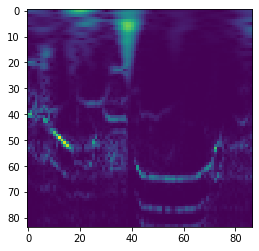

In [25]:
plt.imshow(np.abs(librosa.cqt(y, sr=sr)), interpolation='nearest')
plt.show()

### Mel filter banks

In [26]:
# Extracting and Visualizing Mel spectrograms

filter_banks =  librosa.filters.mel(n_fft=FRAME_SIZE,sr=sr,n_mels=64)


Text(0.5, 1.0, 'Mel Filter Banks')

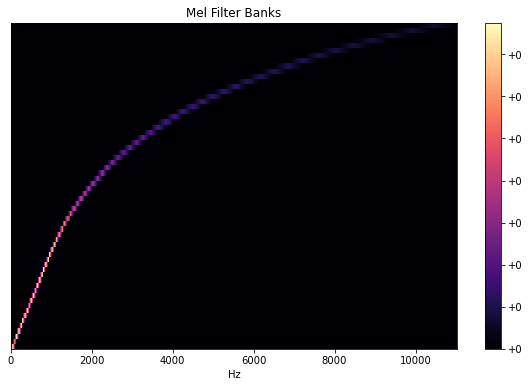

In [27]:
plt.figure(figsize=(10,6))
librosa.display.specshow(filter_banks, x_axis='linear',sr=sr)
plt.colorbar(format='%+2.f')
plt.title('Mel Filter Banks')

In [28]:
filter_banks.shape

(64, 513)

### Extracting Mel Spectrogram

In [29]:
mel_spectrogram = librosa.feature.melspectrogram(y,sr=sr,n_fft=FRAME_SIZE,hop_length=HOP_SIZE,n_mels=128)

In [30]:
mel_spectrogram.shape

(128, 87)

In [31]:
log_mel_spectrogram =  librosa.power_to_db(mel_spectrogram,ref=np.max)

In [32]:
log_mel_spectrogram.shape

(128, 87)

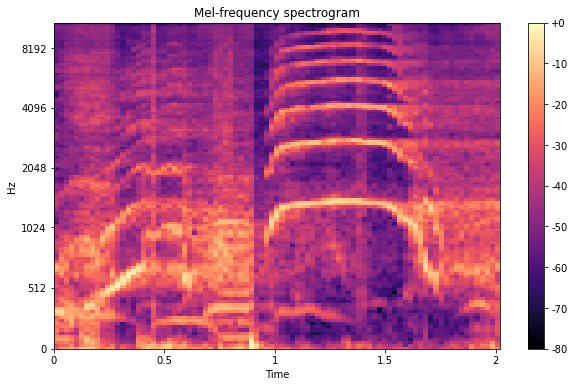

In [33]:
plt.figure(figsize=(10,6))
librosa.display.specshow(log_mel_spectrogram, x_axis='time',y_axis="mel",sr=sr)
plt.colorbar(format='%+2.f')
plt.title('Mel-frequency spectrogram')
plt.savefig(f'{figpath}/melspectrogram.pdf', dpi=300)
plt.show()

In [86]:
#mcc
mfccs = librosa.feature.mfcc(y=y, sr=sr,n_fft=FRAME_SIZE,hop_length=HOP_SIZE,n_mels=256)

In [87]:
mfccs.shape

(20, 87)

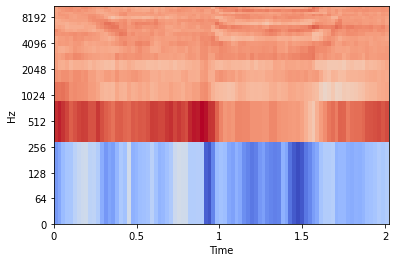

In [90]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time',y_axis="log")
plt.savefig(f'{figpath}/mfcc.pdf', dpi=300)

In [89]:
t = np.array([x for x in range(9,99+1,9)],dtype=np.float64())

In [74]:
t/9

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [92]:
mfccs.reshape(-1,1).shape

(1740, 1)

In [95]:
def build_dataset(files,FRAME_SIZE,HOP_SIZE,N_MELS=256):
    data = []
    for file in files:
        y,sr  =  librosa.load(file)
        print(y.shape)
        return 1
        mfccs = librosa.feature.mfcc(y=y, sr=sr,n_fft=FRAME_SIZE,hop_length=HOP_SIZE,n_mels=256)
    pass

In [97]:
build_dataset(files,FRAME_SIZE,HOP_SIZE,N_MELS=256)

(44100,)


1